[[836.        706.         26.8435456]
 [836.        592.         26.8435456]
 [836.        505.         26.8435456]
 ...
 [  0.        165.         10.48576  ]
 [  0.        126.         16.777216 ]
 [  0.          0.         10.48576  ]]


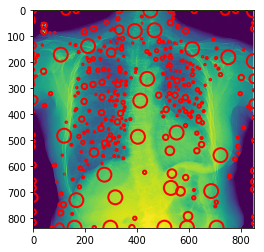

In [0]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog
from skimage.color import rgb2gray
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

og_image =  ndimage.imread('xray.png')
og_image = rgb2gray(og_image)

k = 2 ** (0.5)
s = 1.6

scalevec = np.array([s,k*s,s*(k**2),s*(k**3),s*(k**4)])
gaussval = np.zeros((og_image.shape[0],og_image.shape[1],5))
for i in range(0,5):
    gaussval[:,:,i] = ndimage.filters.gaussian_filter(og_image,scalevec[i])
    
dog = np.zeros((og_image.shape[0],og_image.shape[1],4))
for i in range(0,4):
    dog[:,:,i] = gaussval[:,:,i+1]-gaussval[:,:,i]
    
print(dog.shape)

blobs_dog = blob_dog(og_image,max_sigma=30,threshold=0.03)
print(blobs_dog)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(og_image)
for y,x,r in blobs_dog:
    c = plt.Circle((x,y),r,color='red',linewidth=2,fill=False)
    ax.add_patch(c)

plt.show()


